In [1]:
from autotsc.models import AutoTSCModel2
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed
import polars as pl
import numpy as np
from autotsc.utils import load_dataset
import os

2025-11-14 18:58:54.491276: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train, y_train, X_test, y_test = load_dataset("Computers")
# X_train, y_train, X_test, y_test = load_dataset("ArrowHead")
# X_train, y_train, X_test, y_test = load_dataset("Ham")

model = AutoTSCModel2(verbose=1, n_jobs=-1)

In [3]:
model.fit(X_train, y_train)

2025-11-14 18:59:00,417	INFO worker.py:2012 -- Started a local Ray instance.
/home/gasper_p/workspace/repos/AutoTSC/.venv/lib/python3.12/site-packages/ray/_private/worker.py:2051: FutureWarning: Tip: In future versions of Ray, Ray will no longer override accelerator visible devices env var if num_gpus=0 or num_gpus=None (default). To enable this behavior and turn off this error message, set RAY_ACCEL_ENV_VAR_OVERRIDE_ON_ZERO=0
  warnings.warn(


|------------------------|
| Number of samples: 250 |
| Number of channels: 1  |
| Length of series: 720  |
| Number of classes: 2   |
| CPUs: 24/24            |
| GPUs: 2/2              |
|------------------------|


(train_fold pid=2167428) 2025-11-14 18:59:04.948597: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(train_fold pid=2167428) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
(train_fold pid=2167437) 2025-11-14 18:59:04.988485: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations. [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(train_fold pid=2167437) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags. [repeated 5x across cluster]


,n_jobs,-1
,n_gpus,-1
,n_folds,8
,verbose,1
,model_n_jobs,4


In [4]:
summary = model.summary()
summary

model_id,classifier,fold_predictions,fold_probabilities,true_labels,validation_accuracy,training_time_seconds,stacking_level
str,str,list[str],list[list[f64]],list[str],f64,f64,i64
"""2""","""DummyClassifier()""","[""1"", ""1"", … ""1""]","[[0.502283, 0.497717], [0.5, 0.5], … [0.502283, 0.497717]]","[""1"", ""1"", … ""2""]",0.488,0.000719,0
"""3""","""SklearnClassifierWrapper(class…","[""2"", ""2"", … ""2""]","[[0.496512, 0.503488], [0.42973, 0.57027], … [0.454484, 0.545516]]","[""1"", ""1"", … ""2""]",0.5,0.040817,0
"""27""","""SklearnClassifierWrapper(class…","[""2"", ""1"", … ""1""]","[[0.164624, 0.835376], [0.533769, 0.466231], … [0.581846, 0.418154]]","[""1"", ""1"", … ""2""]",0.608,0.11574,0
"""5""","""SklearnClassifierWrapper(class…","[""2"", ""2"", … ""1""]","[[0.2, 0.8], [0.45, 0.55], … [0.7, 0.3]]","[""1"", ""1"", … ""2""]",0.624,0.116365,0
"""26""","""SklearnClassifierWrapper(class…","[""2"", ""2"", … ""1""]","[[0.2, 0.8], [0.45, 0.55], … [0.7, 0.3]]","[""1"", ""1"", … ""2""]",0.624,0.116096,0
…,…,…,…,…,…,…,…
"""10""","""MultiRocketClassifier(estimato…","[""2"", ""2"", … ""1""]","[[0.427511, 0.572489], [0.374273, 0.625727], … [0.55676, 0.44324]]","[""1"", ""1"", … ""2""]",0.848,0.204323,0
"""21""","""QUANTClassifier(random_state=1…","[""1"", ""2"", … ""2""]","[[0.515, 0.485], [0.46, 0.54], … [0.465, 0.535]]","[""1"", ""1"", … ""2""]",0.864,1.261992,0
"""ridge""","""RidgeClassifierCV()""","[""1"", ""2"", … ""2""]",null,"[""1"", ""1"", … ""2""]",0.868,null,1


In [5]:
p = model.predict_proba_per_model(X_test)

2025-11-14 18:59:25,384	INFO worker.py:2012 -- Started a local Ray instance.
(make_prediction pid=2172223) 2025-11-14 18:59:29.958627: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(make_prediction pid=2172223) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
(make_prediction pid=2172237) 2025-11-14 18:59:29.958626: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations. [repeated 5x across cluster]
(make_prediction pid=2172237) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags. [repeated 5x across cluster]


In [6]:
preds = model.predict_per_model(X_test)

2025-11-14 18:59:43,337	INFO worker.py:2012 -- Started a local Ray instance.
(make_prediction pid=2176014) 2025-11-14 18:59:47.860560: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(make_prediction pid=2176014) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
(make_prediction pid=2176003) 2025-11-14 18:59:47.860560: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations. [repeated 5x across cluster]
(make_prediction pid=2176003) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags. [repeated 5x across cluster]
2025-11-14 19:00:01,262	INFO worker.py:2012 -- Started a local Ray instance.
(make_prediction pid=2179784) 2025-11-14 19:

In [7]:
sdf = []

for x, y in preds.items():
    acc = accuracy_score(y_test, y)
    sdf.append({
        "model_id": x,
        "test_accuracy": acc
    })
sdf = pl.DataFrame(sdf)
sdf

model_id,test_accuracy
str,f64
"""0""",0.78
"""1""",0.72
"""2""",0.5
"""3""",0.488
"""4""",0.736
…,…
"""26""",0.624
"""27""",0.636
"""ridge""",0.8


In [8]:
summary = summary.join(sdf, on="model_id")
summary.sort("test_accuracy")

model_id,classifier,fold_predictions,fold_probabilities,true_labels,validation_accuracy,training_time_seconds,stacking_level,test_accuracy
str,str,list[str],list[list[f64]],list[str],f64,f64,i64,f64
"""3""","""SklearnClassifierWrapper(class…","[""2"", ""2"", … ""2""]","[[0.496512, 0.503488], [0.42973, 0.57027], … [0.454484, 0.545516]]","[""1"", ""1"", … ""2""]",0.5,0.040817,0,0.488
"""2""","""DummyClassifier()""","[""1"", ""1"", … ""1""]","[[0.502283, 0.497717], [0.5, 0.5], … [0.502283, 0.497717]]","[""1"", ""1"", … ""2""]",0.488,0.000719,0,0.5
"""5""","""SklearnClassifierWrapper(class…","[""2"", ""2"", … ""1""]","[[0.2, 0.8], [0.45, 0.55], … [0.7, 0.3]]","[""1"", ""1"", … ""2""]",0.624,0.116365,0,0.624
"""26""","""SklearnClassifierWrapper(class…","[""2"", ""2"", … ""1""]","[[0.2, 0.8], [0.45, 0.55], … [0.7, 0.3]]","[""1"", ""1"", … ""2""]",0.624,0.116096,0,0.624
"""27""","""SklearnClassifierWrapper(class…","[""2"", ""1"", … ""1""]","[[0.164624, 0.835376], [0.533769, 0.466231], … [0.581846, 0.418154]]","[""1"", ""1"", … ""2""]",0.608,0.11574,0,0.636
…,…,…,…,…,…,…,…,…
"""6""","""MultiRocketClassifier(estimato…","[""2"", ""2"", … ""1""]","[[0.472261, 0.527739], [0.374801, 0.625199], … [0.578828, 0.421172]]","[""1"", ""1"", … ""2""]",0.832,0.173644,0,0.788
"""12""","""MultiRocketClassifier(estimato…","[""1"", ""2"", … ""1""]","[[0.52166, 0.47834], [0.352447, 0.647553], … [0.581278, 0.418722]]","[""1"", ""1"", … ""2""]",0.844,0.201369,0,0.788
"""pca-ridge""","""Pipeline(steps=[('pca',PCA(n_c…","[""2"", ""2"", … ""1""]",null,"[""1"", ""1"", … ""2""]",0.844,null,1,0.792


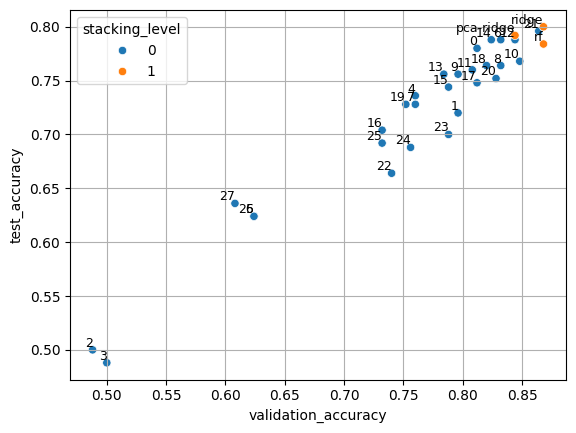

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df = summary.to_pandas()

ax = sns.scatterplot(data=df, x="validation_accuracy", y="test_accuracy", hue="stacking_level")

for i, row in df.iterrows():
    ax.text(row["validation_accuracy"], row["test_accuracy"], str(row["model_id"]),
            fontsize=9, ha='right', va='bottom')
plt.grid()
plt.show()

In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

2025-11-14 19:00:19,660	INFO worker.py:2012 -- Started a local Ray instance.
(make_prediction pid=2183801) 2025-11-14 19:00:24.325911: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(make_prediction pid=2183801) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
(make_prediction pid=2183786) 2025-11-14 19:00:24.282446: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations. [repeated 5x across cluster]
(make_prediction pid=2183786) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags. [repeated 5x across cluster]


Accuracy: 0.7760


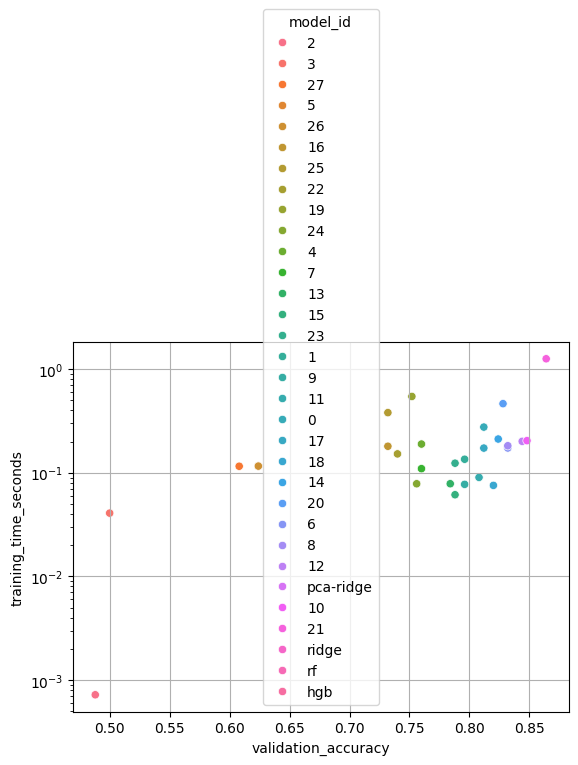

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(
    data=model.summary().to_pandas(), 
    x="validation_accuracy", 
    y="training_time_seconds",
    hue="model_id",
)
plt.grid()
plt.yscale("log")